## Data Set Description

1. age - age in years

2. sex - (1 = male; 0 = female)

3. cp - chest pain type
  0: Typical angina: chest pain related decrease blood supply to the heart
  1: Atypical angina: chest pain not related to heart
  2: Non-anginal pain: typically esophageal spasms (non heart related)
  3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern

5. chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

7. restecg - resting electrocardiographic results
  0: Nothing to note
  1: ST-T Wave abnormality
  can range from mild symptoms to severe problems
  signals non-normal heart beat
  2: Possible or definite left ventricular hypertrophy
  Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest
    looks at stress of heart during excercise
    unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)

13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising

14. AHD/target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Add necessary libararies/ modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset and display the first 40 records an Identify the columns ( 1 Mark )

In [ ]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,39,0,nonanginal,138,220,0,0,152,0,0.0,2,0.0,normal,No
398,399,57,1,nontypical,154,232,0,2,164,0,0.0,1,1.0,normal,Yes
399,400,58,0,asymptomatic,130,197,0,0,131,0,0.6,2,0.0,normal,No
400,401,57,1,asymptomatic,110,335,0,0,143,1,3.0,2,1.0,reversable,Yes


In [ ]:
df.head(40)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,No
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes


#Check any duplicates are there using duplicated() method. Some duplicates are there. ( Hint : Unnamed: 0 - Column is creating the problem)     ( 2 Marks)


*   Display number of duplcaites in the dataset



In [ ]:
df.drop(columns = 'Unnamed: 0', inplace = True )
df.duplicated().sum()

99

In [ ]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,39,0,nonanginal,138,220,0,0,152,0,0.0,2,0.0,normal,No
398,57,1,nontypical,154,232,0,2,164,0,0.0,1,1.0,normal,Yes
399,58,0,asymptomatic,130,197,0,0,131,0,0.6,2,0.0,normal,No
400,57,1,asymptomatic,110,335,0,0,143,1,3.0,2,1.0,reversable,Yes


# Check any Null values - Identify the suitable Imputing technique  for the attribute **Ca**  and apply the same.  ( 2 Marks )

In [ ]:
df.isnull().sum()

Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca           10
Thal          2
AHD           0
dtype: int64

In [ ]:
ca_mode = df.Ca.mode()[0]
ca_mode

0.0

In [ ]:
df["Ca"].fillna(ca_mode,inplace = True)

df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
AHD          0
dtype: int64

In [ ]:
Thal_mode = df.Thal.mode()[0]
Thal_mode

'normal'

In [ ]:
df["Thal"].fillna(Thal_mode,inplace = True)

df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

# Visualize the outlier data using Box Plot for the column : RestBP 1 ( 1 Mark )

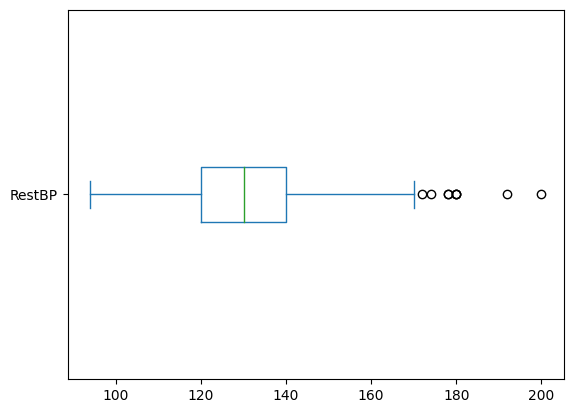

In [ ]:
ax = df.RestBP.plot.box(vert=False)

# Remove the outliers from the data set based on the column : RestBP ( 2 Marks) USING Z Score method

In [ ]:
min = df['RestBP'].min()
max = df['RestBP'].max()
print(min)
print(max)

94
200


In [ ]:
print("Upper limit",df['RestBP'].mean() + 3*df['RestBP'].std())
print("Lower limit",df['RestBP'].mean() - 3*df['RestBP'].std())

Upper limit 184.3434047811321
Lower limit 80.33818725866888


In [ ]:
s = df['RestBP'].describe()
s

count    402.000000
mean     132.340796
std       17.334203
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestBP, dtype: float64

In [ ]:
#-3sigma to +3sigma as stanard deviation Hint: df['col'].mean to compute mean, df['col'].std() to find std.
df['RestBP'].mean()

132.3407960199005

In [ ]:
df['RestBP'].std()

17.334202920410537

In [ ]:
df['zscore'] = (df['RestBP'] - 132.3407960199005)/17.33420292041053
df['zscore']

0      0.730302
1      1.595643
2     -0.711933
3     -0.135039
4     -0.135039
         ...   
397    0.326476
398    1.249507
399   -0.135039
400   -1.288827
401   -0.135039
Name: zscore, Length: 402, dtype: float64

In [ ]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,zscore
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0.730302
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1.595643
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,-0.711933
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,-0.135039
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,-0.135039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,39,0,nonanginal,138,220,0,0,152,0,0.0,2,0.0,normal,No,0.326476
398,57,1,nontypical,154,232,0,2,164,0,0.0,1,1.0,normal,Yes,1.249507
399,58,0,asymptomatic,130,197,0,0,131,0,0.6,2,0.0,normal,No,-0.135039
400,57,1,asymptomatic,110,335,0,0,143,1,3.0,2,1.0,reversable,Yes,-1.288827


In [ ]:
df = df.loc[(abs(df['zscore']))<1]
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,zscore
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0.730302
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,-0.711933
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,-0.135039
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,-0.135039
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No,-0.711933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,59,1,typical,134,204,0,0,162,0,0.8,1,2.0,normal,Yes,0.095719
396,66,0,nonanginal,146,278,0,2,152,0,0.0,2,1.0,normal,No,0.787991
397,39,0,nonanginal,138,220,0,0,152,0,0.0,2,0.0,normal,No,0.326476
399,58,0,asymptomatic,130,197,0,0,131,0,0.6,2,0.0,normal,No,-0.135039


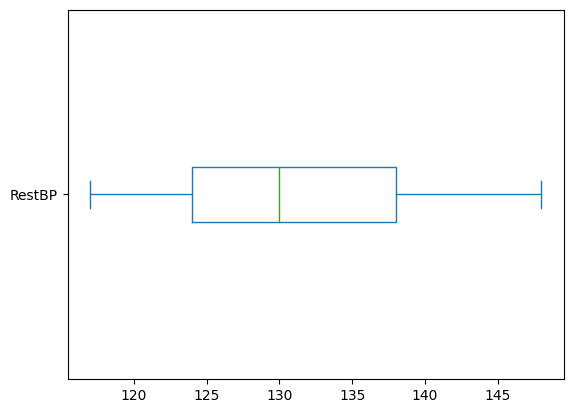

In [ ]:
ax = df.RestBP.plot.box(vert=False)

## Visualize the Correlation between the MaxHR vs AHD ( 2 Marks )

In [ ]:
df['AHD']= df["AHD"].replace({'Yes': 1, 'No': 0})
df

<ipython-input-22-75878e9bad7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AHD']= df["AHD"].replace({'Yes': 1, 'No': 0})


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,zscore
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0,0.730302
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1,-0.711933
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0,-0.135039
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0,-0.135039
5,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0,-0.711933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,59,1,typical,134,204,0,0,162,0,0.8,1,2.0,normal,1,0.095719
396,66,0,nonanginal,146,278,0,2,152,0,0.0,2,1.0,normal,0,0.787991
397,39,0,nonanginal,138,220,0,0,152,0,0.0,2,0.0,normal,0,0.326476
399,58,0,asymptomatic,130,197,0,0,131,0,0.6,2,0.0,normal,0,-0.135039


In [ ]:
df[['MaxHR','AHD']].corr()

,MaxHR,AHD
MaxHR,1.000000,-0.463012
AHD,-0.463012,1.000000
